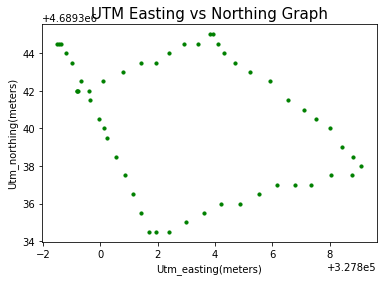

Variation(Max-Min) in UTM Northing: 10.5m, Standard Deviation is 3.39267m & Mean is: 4689340.40m
Variation(Max-Min) in UTM Easting: 10.59375m, Standard Deviation is 3.26559m & Mean is: 327803.05m
Top:  (327803.9375, 4689345.0)
Right:  (327809.09375, 4689338.0)
Bot:  (327801.6875, 4689334.5)
Left:  (327798.5, 4689344.5)


In [7]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import statistics

#file = open('/home/shak/catkin_ws/src/lab2/rosbag/open_stat.csv') #for still data in open area
#file = open('/home/shak/catkin_ws/src/lab2/rosbag/open_walk.csv') #for walking data in open area
#file = open('/home/shak/catkin_ws/src/lab2/rosbag/close_stat.csv') #for still data in partially closed area
file = open('/home/shak/catkin_ws/src/lab2/rosbag/close_walk.csv') #for walking data in partially closed area

csvreader = csv.reader(file)

header = []
header = next(csvreader)

rows = []
for row in csvreader:
		rows.append(row)

time = []
first = rows[0][0]

for i in rows:
	timeInSeconds = int(float(i[0])) - int(float(first))
	time.append(timeInSeconds)	

latitude = []
for i in rows:
	latitude.append(float(i[5]))

longitude = []
for i in rows:
	longitude.append(float(i[6]))
	
altitude = []
for i in rows:
	altitude.append(float(i[7]))
	
utm_easting = []
for i in rows:
	utm_easting.append(float(i[8]))
	
utm_northing = []
for i in rows:
	utm_northing.append(float(i[9]))
	
fix = []
for i in rows:
	fix.append(int(i[10]))
	
#Finding end points
for i in range(len(utm_easting)):
    if utm_easting[i] == max(utm_easting):
        northMaxEast = utm_northing[i]
    if utm_easting[i] == min(utm_easting):
        northMinEast = utm_northing[i]
for i in range(len(utm_northing)):
    if utm_northing[i] == max(utm_northing):
        eastMaxNorth = utm_easting[i]
    if utm_northing[i] == min(utm_northing):
        eastMinNorth = utm_easting[i]

plt.scatter(utm_easting,utm_northing, color = 'green', s = 10)
evn = plt.gca()
evn.set_xlabel('Utm_easting(meters)', fontsize=10)
evn.set_ylabel('Utm_northing(meters)', fontsize=10)
evn.set_title('UTM Easting vs Northing Graph', fontsize=15)
plt.show()

print("Variation(Max-Min) in UTM Northing: {0}m, Standard Deviation is {1:.5f}m & Mean is: {2:.2f}m".format((max(utm_northing) - min(utm_northing)), statistics.stdev(utm_northing), statistics.mean(utm_northing)))
print("Variation(Max-Min) in UTM Easting: {0}m, Standard Deviation is {1:.5f}m & Mean is: {2:.2f}m".format((max(utm_easting) - min(utm_easting)), statistics.stdev(utm_easting), statistics.mean(utm_easting)))


print("Top: ", (eastMaxNorth,max(utm_northing)))
print("Right: ", (max(utm_easting),northMaxEast))
print("Bot: ", (eastMinNorth,min(utm_northing)))
print("Left: ", (min(utm_easting),northMinEast))

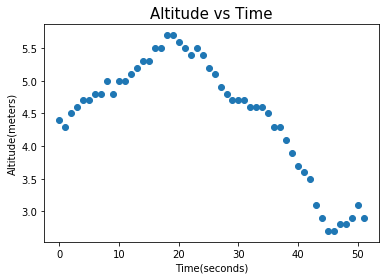

Variation(Max-Min) in altitude: 3.000000m


In [3]:
plt.scatter(time,altitude)
altT = plt.gca()
altT.set_xlabel('Time(seconds)', fontsize=10)
altT.set_ylabel('Altitude(meters)', fontsize=10)
altT.set_title('Altitude vs Time', fontsize=15)
plt.show()

print("Variation(Max-Min) in altitude: {:2f}m".format(max(altitude) - min(altitude)))

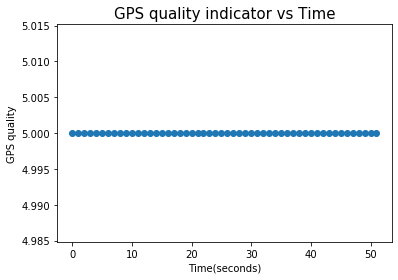

In [4]:
plt.scatter(time,fix)
altT = plt.gca()
altT.set_xlabel('Time(seconds)', fontsize=10)
altT.set_ylabel('GPS quality', fontsize=10)
altT.set_title('GPS quality indicator vs Time', fontsize=15)
plt.show()

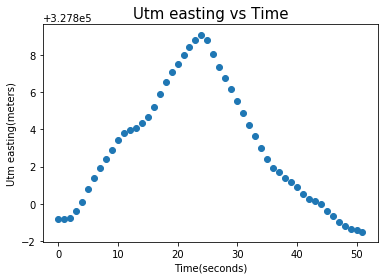

In [5]:
plt.scatter(time,utm_easting)
easT = plt.gca()
easT.set_xlabel('Time(seconds)', fontsize=10)
easT.set_ylabel('Utm easting(meters)', fontsize=10)
easT.set_title('Utm easting vs Time', fontsize=15)
plt.show()

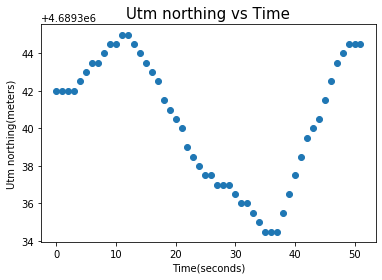

In [6]:
plt.scatter(time,utm_northing)
easT = plt.gca()
easT.set_xlabel('Time(seconds)', fontsize=10)
easT.set_ylabel('Utm northing(meters)', fontsize=10)
easT.set_title('Utm northing vs Time', fontsize=15)
plt.show()